# 1. Generating spike trains
Using models from what we worked on in class, I refactored into a compneuro library.

In [1]:
# load spiking models and analysis techniques
from compneuro import *

In [2]:
# constants
T = 2 # seconds
NUM_SPIKETRAINS = 1000 # spike trains

# method parameters
# rate range, burst rate range, tau_ref, tau_burst, p_start_burst, p_exit_burst
method1 = [(15,20), (0,), (0,), (0,), (0,), (0,)]
method2 = [(20,22), (0,), (20,25), (0,), (0,), (0,)]
method2 = [(4,8), (80,90), (2,4), (40,60), (0.4,0.6), (0.2,0.3)]

In [22]:
# generate spike trains!
meth1 = [poisson_refractory_method1(np.random.randint(15,21), T, tau_ref=0) for i in range(NUM_SPIKETRAINS)]
meth2 = [poisson_refractory_method2(np.random.randint(20,23), T, tau_ref=np.random.randint(20,26) / 1000) for i in range(NUM_SPIKETRAINS)]
meth2_burst = [poisson_burst_method2(np.random.randint(4,9), np.random.randint(80,91), T, tau_ref=np.random.randint(2,5)/1000, tau_burst=np.random.randint(40,61)/1000, prob_burst=np.random.uniform(0.4,0.6), prob_end=np.random.uniform(0.2,0.3)) for i in range(NUM_SPIKETRAINS)]

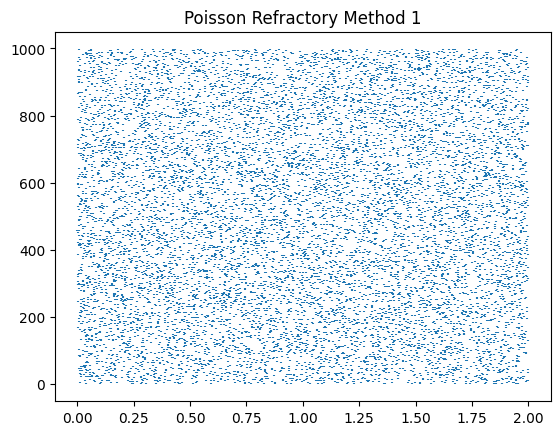

In [23]:
plt.eventplot(meth1);
plt.title("Poisson Refractory Method 1");

The figure shows uniformly random Poisson spiking trains. There is no refractory period so we don't see any gaps after spike sequences.

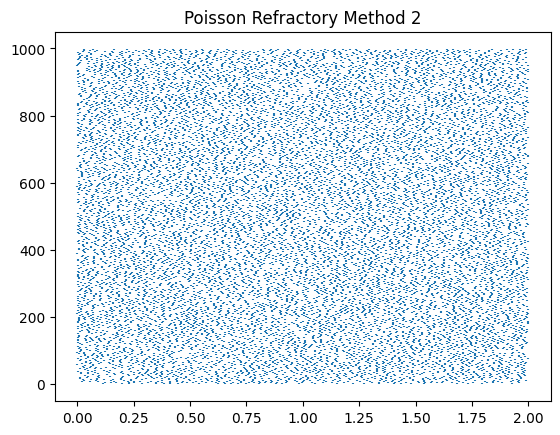

In [5]:
plt.eventplot(meth2);
plt.title("Poisson Refractory Method 2");

This method has a refractory period so we do see gaps after each sequence of spikes, making the graph appear more ordered.

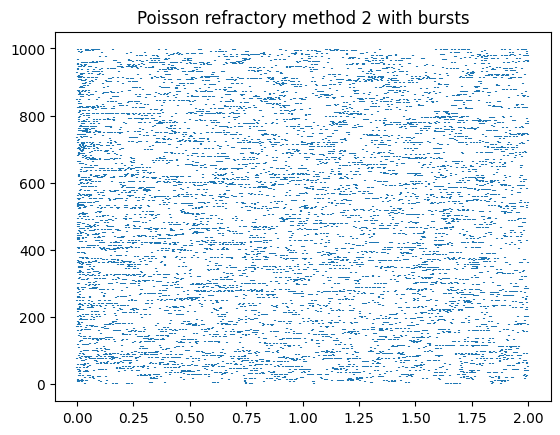

In [6]:
plt.eventplot(meth2_burst);
plt.title("Poisson refractory method 2 with bursts");

We now have a chance of enturing a burst, continuing to burst, and exiting a burst along with a high burst rate and modest regular rate. The graph contains long trains of spikes as well as long gaps of no spikes.

# 2. Determining Coefficient of Variation (CV) and Fano Factor
Examining CV and Fano Factors for each trial (row) of the spike train graphs.

In [7]:
CV_meth1 = [cv(trial) for trial in meth1]
CV_meth2 = [cv(trial) for trial in meth2]
CV_meth2_bursts = [cv(trial) for trial in meth2_burst]

In [17]:
# use seaborn
import seaborn as sns
bins = np.linspace(0,3,100)

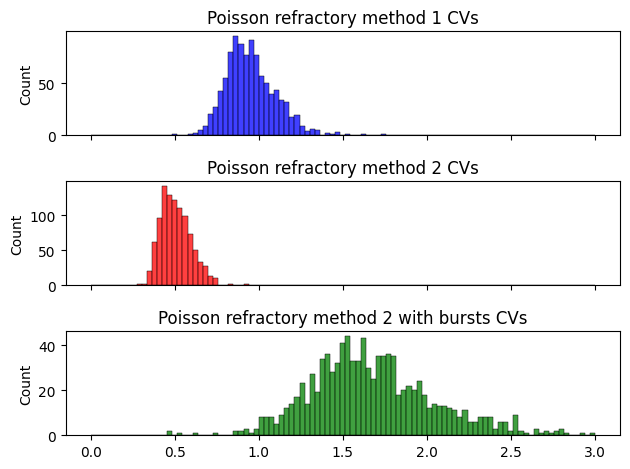

In [18]:
fig, axes = plt.subplots(3,1, sharex=True)
sns.histplot(CV_meth1, bins=bins, color='blue',ax=axes[0])
axes[0].set_title("Poisson refractory method 1 CVs");
sns.histplot(CV_meth2, bins=bins, color='red', ax=axes[1])
axes[1].set_title("Poisson refractory method 2 CVs");
sns.histplot(CV_meth2_bursts, bins=bins, color='green', ax=axes[2])
axes[2].set_title("Poisson refractory method 2 with bursts CVs");
plt.tight_layout()

The CVs for method 1 are centered around 1 which is what we would expect for a Poisson / memoryless distribution (?). Method 2 has a refractory period which makes the spike timings much more regular, pushing the CV lower because the standard deviation is lower. Method 2 with bursts increases the standard deviation because sometimes there will be bursts and sometimes there won't be for long stretches, increasing the standard deviation and therefore the CV.

In [13]:
FanoFactor_meth1 = [fano_factor(trial, 0, T, 0.05) for trial in meth1]
FanoFactor_meth2 = [fano_factor(trial, 0, T, 0.05) for trial in meth2]
FanoFactor_meth2_bursts = [fano_factor(trial, 0, T, 0.05) for trial in meth2_burst]

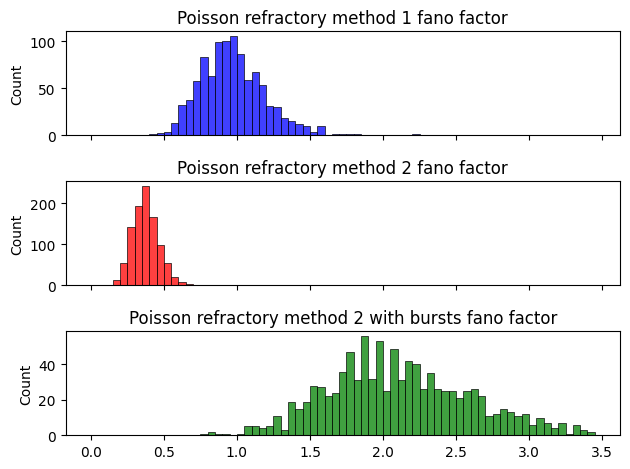

In [19]:
bins = np.arange(0,3.5,0.05)
fig, axes = plt.subplots(3,1, sharex=True)
sns.histplot(FanoFactor_meth1, bins=bins, color='blue',ax=axes[0])
axes[0].set_title("Poisson refractory method 1 fano factor");
sns.histplot(FanoFactor_meth2, bins=bins, color='red', ax=axes[1])
axes[1].set_title("Poisson refractory method 2 fano factor");
sns.histplot(FanoFactor_meth2_bursts, bins=bins, color='green', ax=axes[2])
axes[2].set_title("Poisson refractory method 2 with bursts fano factor");
plt.tight_layout()

Method 1 is centered on 1 and this makes sense because the fano factor is defined as $F(t) = \frac{\sigma_t^2}{\mu_t}$ and for a Poisson distribution $\sigma = \sqrt{\lambda}$ and $\mu = \lambda$. Method 2 has a much lower fano factor because of the refractory period shrinking the standard deviation. Method 2 with bursts has a large and spread out fano factor distribution because the burst spike trains increase the standard deviation.

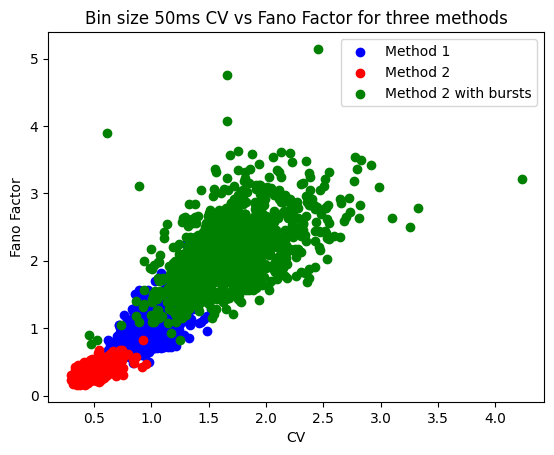

In [36]:
# scatter plot of fano factor vs CV
plt.scatter(CV_meth1, FanoFactor_meth1, color='blue', label='Method 1');
plt.scatter(CV_meth2, FanoFactor_meth2, color='red', label='Method 2');
plt.scatter(CV_meth2_bursts, FanoFactor_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 50ms CV vs Fano Factor for three methods");
plt.xlabel('CV')
plt.ylabel('Fano Factor')
plt.legend();
plt.show()


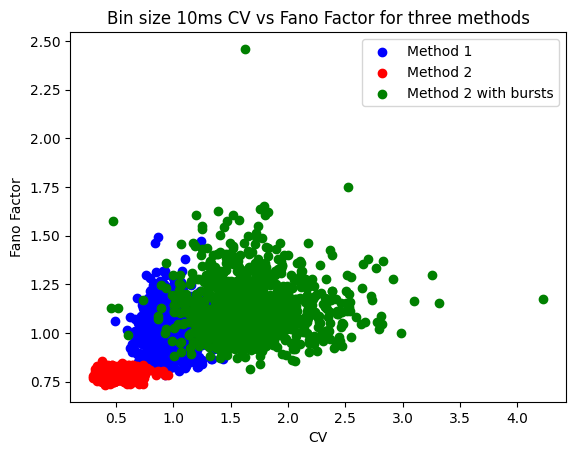

In [40]:
# bin size 10ms
FanoFactor_meth1 = [fano_factor(trial, 0, T, 0.01) for trial in meth1]
FanoFactor_meth2 = [fano_factor(trial, 0, T, 0.01) for trial in meth2]
FanoFactor_meth2_bursts = [fano_factor(trial, 0, T, 0.01) for trial in meth2_burst]

# scatter plot of fano factor vs CV
plt.scatter(CV_meth1, FanoFactor_meth1, color='blue', label='Method 1');
plt.scatter(CV_meth2, FanoFactor_meth2, color='red', label='Method 2');
plt.scatter(CV_meth2_bursts, FanoFactor_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 10ms CV vs Fano Factor for three methods");
plt.xlabel('CV')
plt.ylabel('Fano Factor')
plt.legend();
plt.show()

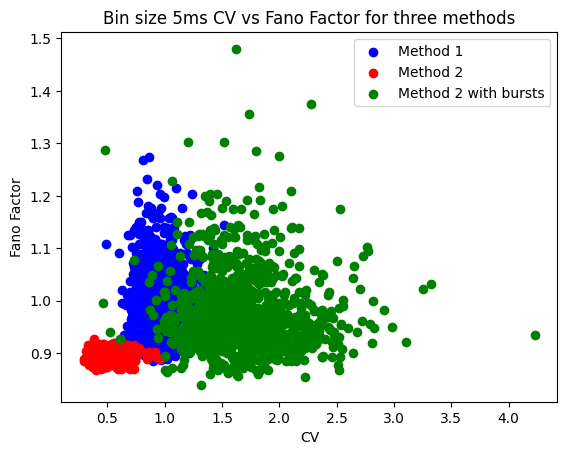

In [41]:
# bin size 5ms
FanoFactor_meth1 = [fano_factor(trial, 0, T, 0.005) for trial in meth1]
FanoFactor_meth2 = [fano_factor(trial, 0, T, 0.005) for trial in meth2]
FanoFactor_meth2_bursts = [fano_factor(trial, 0, T, 0.005) for trial in meth2_burst]

# scatter plot of fano factor vs CV
plt.scatter(CV_meth1, FanoFactor_meth1, color='blue', label='Method 1');
plt.scatter(CV_meth2, FanoFactor_meth2, color='red', label='Method 2');
plt.scatter(CV_meth2_bursts, FanoFactor_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 5ms CV vs Fano Factor for three methods");
plt.xlabel('CV')
plt.ylabel('Fano Factor')
plt.legend();
plt.show()

# 3. Autocorrelogram plots
To visualize the frequency of spike time differences (lags).

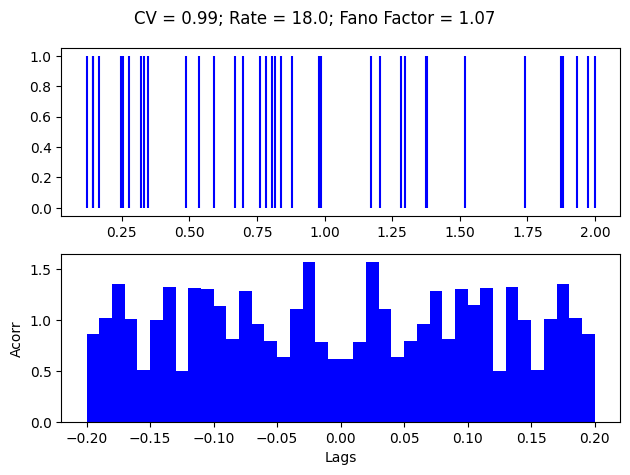

In [67]:
first_meth1 = meth1[0]
lags, acorr = autocorrelogram(first_meth1, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)
rate = lambda x: len(x) / T
plt.suptitle(f"CV = {cv(first_meth1):.02f}; Rate = {rate(first_meth1)}; Fano Factor = {fano_factor(first_meth1, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth1, ymin=0, ymax=1, linewidth=1.5, color='blue')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='blue')
plt.show();

We see a seemingly uniform random distribution of spikes and also lags, showing no refractory period (because there isn't a gap in the middle).

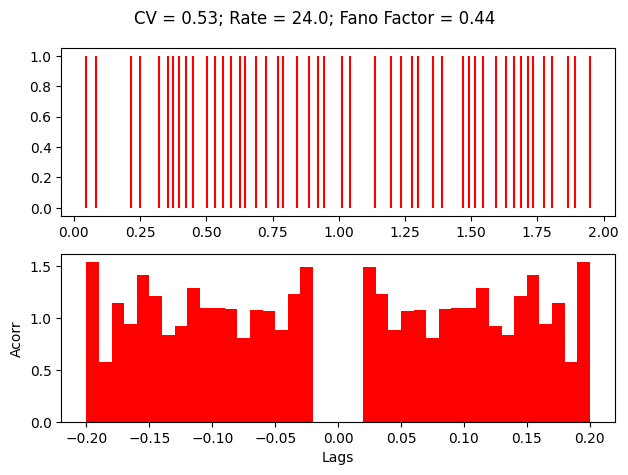

In [70]:
first_meth1 = meth2[0]
lags, acorr = autocorrelogram(first_meth1, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)
rate = lambda x: len(x) / T
plt.suptitle(f"CV = {cv(first_meth1):.02f}; Rate = {rate(first_meth1)}; Fano Factor = {fano_factor(first_meth1, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth1, ymin=0, ymax=1, linewidth=1.5, color='red')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='red')
plt.show();

The autocorrelogram visually shows us the existance of the refractory period because there are no spikes within a certain amount of time (refractory period) of any other spikes. Besides this it appears uniformly random.

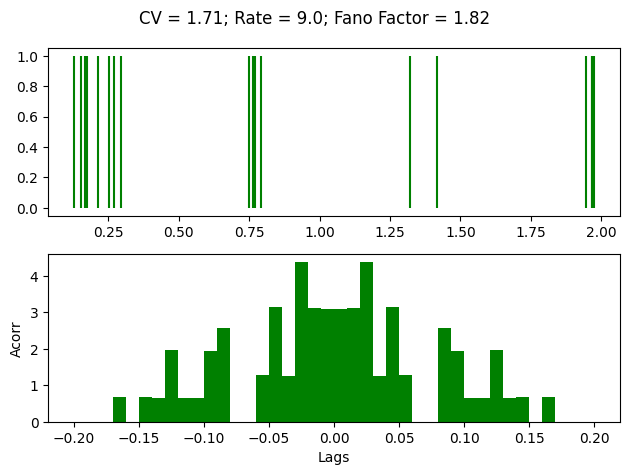

In [71]:
first_meth1 = meth2_burst[0]
lags, acorr = autocorrelogram(first_meth1, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)
rate = lambda x: len(x) / T
plt.suptitle(f"CV = {cv(first_meth1):.02f}; Rate = {rate(first_meth1)}; Fano Factor = {fano_factor(first_meth1, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth1, ymin=0, ymax=1, linewidth=1.5, color='green')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='green')
plt.show();

The autocorrelogram shows us that most lags are very short and we can extrapolate from that and the spike train graph that we are dealing with a bursting neuron.

# 4. Peristimulus Time Histogram (PSTH)
To visualize how a neuron responded to an event.

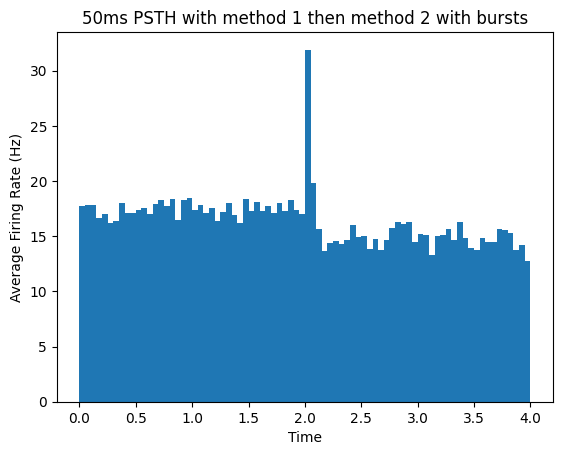

In [ ]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.05

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("50ms PSTH with method 1 then method 2 with bursts")
plt.show()


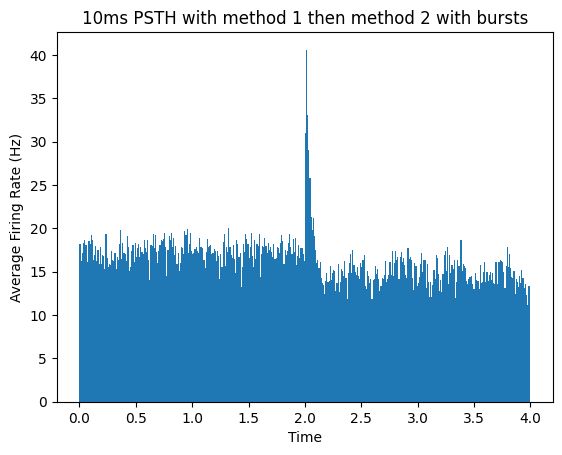

In [97]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.01

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("10ms PSTH with method 1 then method 2 with bursts")
plt.show()

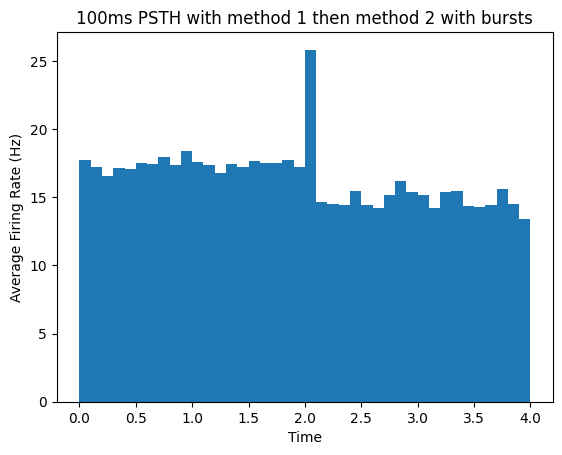

In [98]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.1

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("100ms PSTH with method 1 then method 2 with bursts")
plt.show()

# 5. How does fano factor change based on the bin size?
Using a much longer simulation

In [107]:
T = 10

# generate spike trains!
meth1 = poisson_refractory_method1(np.random.randint(15,21), T, tau_ref=0)
meth2 = poisson_refractory_method2(np.random.randint(20,23), T, tau_ref=np.random.randint(20,26) / 1000)
meth2_burst = poisson_burst_method2(np.random.randint(4,9), np.random.randint(80,91), T, tau_ref=np.random.randint(2,5)/1000, tau_burst=np.random.randint(40,61)/1000, prob_burst=np.random.uniform(0.4,0.6), prob_end=np.random.uniform(0.2,0.3))

In [117]:
# calculate fano factor for different values of bin sizes
bin_size = np.arange(0.002, 1.0, 0.002)
meth1_ffs = [fano_factor(meth1, 0, T, b) for b in bin_size]
meth2_ffs = [fano_factor(meth2, 0, T, b) for b in bin_size]
meth2_burst_ffs = [fano_factor(meth2_burst, 0, T, b) for b in bin_size]

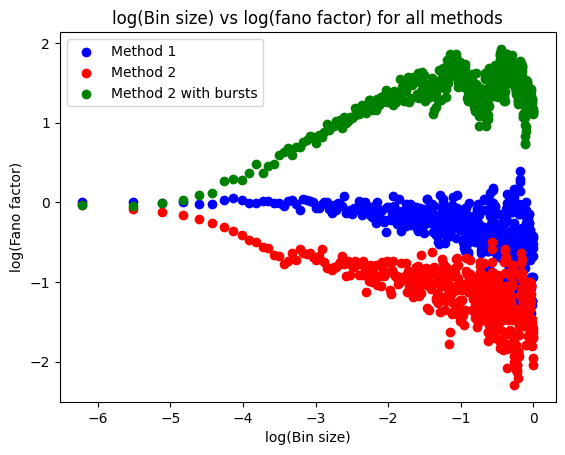

In [118]:
logbin_size = np.log(bin_size)
logmeth1_ffs = np.log(meth1_ffs)
logmeth2_ffs = np.log(meth2_ffs)
logmeth2_burst_ffs = np.log(meth2_burst_ffs)
plt.scatter(logbin_size, logmeth1_ffs, color='blue', label='Method 1')
plt.scatter(logbin_size, logmeth2_ffs, color='red', label='Method 2')
plt.scatter(logbin_size, logmeth2_burst_ffs, color='green', label='Method 2 with bursts')
plt.title('log(Bin size) vs log(fano factor) for all methods')
plt.xlabel('log(Bin size)')
plt.ylabel('log(Fano factor)')
plt.legend()
plt.show()